<a href="https://colab.research.google.com/github/prudhvijiddigam/Computational-Methods/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [20]:
# Write your code here
import nltk; 
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
import pandas as pd
import numpy as np
import spacy

titles = pd.read_csv('/content/titles_data.csv',encoding = "ISO-8859-1")

In [22]:
titles

,Title
0,Data scienceÊand prediction
1,Data scienceÊand its relationship to bigÊdataÊ...
2,Data ScienceÊfor Business: What you need to kn...
3,High-dimensional probability: An introduction ...
4,Computational optimal transport: With applicat...
...,...
95,Adversarial machine learning
96,Applications of machine learning and rule indu...
97,Machine learning and data mining
98,Interpretable machine learning


In [23]:
!pip install pyLDAvis

In [24]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
!pip install -U gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (3.8.3)


In [28]:
print(titles.Title.unique())
titles.head()


['Data scienceÊand prediction'
 'Data scienceÊand its relationship to bigÊdataÊandÊdata-driven decision making'
 'Data ScienceÊfor Business: What you need to know aboutÊdataÊmining andÊdata-analytic thinking'
 'High-dimensional probability: An introduction with applications inÊdata science'
 'Computational optimal transport: With applications to data science'
 'Data science, predictive analytics, and big data: a revolution that will transform supply chain design and management'
 'Reproducible, interactive, scalable and extensible microbiomeÊdata scienceÊusing QIIME 2'
 'The quantified self: Fundamental disruption in bigÊdata scienceÊand biological discovery'
 'Putting the data science into journalism'
 'Big data: astronomical or genomical'
 'A comprehensive survey of clustering algorithms' 'DataÊmining'
 'Analyzing social science data: 50 key problems in data analysis'
 'TheÊdataÊdeluge: An e-scienceÊperspective'
 'Machine learning: the art and science of algorithms that make sense of 

,Title
0,Data scienceÊand prediction
1,Data scienceÊand its relationship to bigÊdataÊ...
2,Data ScienceÊfor Business: What you need to kn...
3,High-dimensional probability: An introduction ...
4,Computational optimal transport: With applicat...


In [36]:
def cleaned_text(s):
    removes = ['[PDF][PDF] ', '[BOOK][B] ', '[HTML][HTML] ', '[CITATION][C] ']
    for remove in removes:
        if remove in s:
            s = s.replace(remove, '')
    return s
titles.Title = titles.Title.apply(cleaned_text)

def new_text(data):
    import re
    data = re.sub("'s",'',str(data))
    data = re.sub("-",' ',str(data))
    data = re.sub("— ",'',str(data))
    data = re.sub('\"','',str(data))
    data = re.sub('[^\w\s]','', str(data))
    return data
    
titles.Title.apply(new_text)


0                           Data scienceÊand prediction
1     Data scienceÊand its relationship to bigÊdataÊ...
2     Data ScienceÊfor Business What you need to kno...
3     High dimensional probability An introduction w...
4     Computational optimal transport With applicati...
                            ...                        
95                         Adversarial machine learning
96    Applications of machine learning and rule indu...
97                     Machine learning and data mining
98                       Interpretable machine learning
99                 Machine learning for medical imaging
Name: Title, Length: 100, dtype: object

In [38]:
text = titles.Title.values.tolist()
text = [re.sub('\S*@\S*\s?', '', sent) for sent in text]
text = [re.sub('\s+', ' ', sent) for sent in text]
text = [re.sub("\'", "", sent) for sent in text]
print(text[:1])

def convert(lines):
    for line in lines:
        yield(gensim.utils.simple_preprocess(str(line), deacc=True))  

words_conv = list(convert(text))

print(words_conv[:1])

['Data scienceÊand prediction']
[['data', 'scienceeand', 'prediction']]


In [51]:

bigram = gensim.models.Phrases(words_conv, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[words_conv], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[words_conv[0]]])


['data', 'scienceeand', 'prediction']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  Phrases detected in `sentences`. Return type depends on the `as_tuples` parameter.


In [63]:
import nltk
from nltk.corpus import stopwords
def stopwords(data):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data]
def bigrams(data):
    return [bigram_mod[doc] for doc in data]
def trigrams(data):
    return [trigram_mod[bigram_mod[doc]] for doc in data]
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [73]:

import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

words = remove_stop_words(words_conv)
bigram_words= make_bigrams(words)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(bigram_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])


[['prediction']]


In [76]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:5])

[[(0, 1)], [(1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(7, 1), (12, 1), (17, 1), (18, 1)]]


In [77]:
id2word[0]
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('prediction', 1)],
 [('decision', 1), ('drive', 1), ('making', 1), ('relationship', 1)],
 [('analytic', 1),
  ('business', 1),
  ('datum', 1),
  ('know', 1),
  ('nee', 1),
  ('scienceefor', 1),
  ('thinking', 1)],
 [('application', 1),
  ('dimensional', 1),
  ('high', 1),
  ('introduction', 1),
  ('probability', 1),
  ('science', 1)],
 [('datum', 1), ('application', 1), ('science', 1), ('transport', 1)]]

In [72]:

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=after_lemmatization, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

[(0,
  '0.109*"algorithm" + 0.109*"machine" + 0.073*"make" + 0.073*"sense" + '
  '0.073*"datum" + 0.073*"science" + 0.038*"current" + 0.038*"cluster" + '
  '0.038*"comprehensive" + 0.038*"research"'),
 (1,
  '0.062*"datum" + 0.062*"discovery" + 0.032*"transform" + 0.032*"biological" '
  '+ 0.032*"supply" + 0.032*"design" + 0.032*"management" + 0.032*"predictive" '
  '+ 0.032*"revolution" + 0.032*"chain"'),
 (2,
  '0.070*"know" + 0.070*"datum" + 0.070*"scienceefor" + 0.070*"foundation" + '
  '0.070*"nee" + 0.070*"analytic" + 0.070*"business" + 0.070*"thinking" + '
  '0.005*"learning" + 0.005*"machine"'),
 (3,
  '0.299*"machine" + 0.123*"learning" + 0.042*"learn" + 0.037*"optimization" + '
  '0.019*"environment" + 0.019*"impact" + 0.019*"base" + 0.019*"sequential" + '
  '0.019*"review" + 0.019*"argument"'),
 (4,
  '0.178*"perspective" + 0.167*"learn" + 0.138*"machine" + '
  '0.121*"probabilistic" + 0.003*"optimization" + 0.003*"model" + '
  '0.003*"review" + 0.003*"sequential" + 0.003*"b

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  co_occur_count = accumulator[w_prime, w_star]
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  segment_sims = []



Coherence Score:  nan


In [78]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.560397045674977

Coherence Score:  0.6209907759849344


In [79]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.195582 -0.061092       1        1  13.033395
17    -0.149863  0.025225       2        1  12.239769
19    -0.192694  0.063623       3        1  11.020623
1      0.186805  0.179920       4        1   8.077959
9     -0.154996 -0.039313       5        1   7.152580
0     -0.021761  0.087495       6        1   6.650475
11    -0.103983  0.060941       7        1   6.231757
5     -0.055803  0.125759       8        1   6.199577
15    -0.008982 -0.080426       9        1   3.843687
4     -0.026357 -0.098263      10        1   3.502461
6      0.164822 -0.089705      11        1   3.133560
2      0.147722  0.031491      12        1   3.062987
12    -0.075798 -0.021342      13        1   2.803173
10    -0.059905 -0.012301      14        1   2.527794
7      0.163085 -0.079397      15        1   2.460136
16     0.137792  0.022873      16        1   2.246772
14    -0.007571 -0.023382      17        1   2.160648
18     0.046146 -0.056511      18        1   1.843664
13     0.092878 -0.018907      19        1   1.048278
8      0.114046 -0.016687      20        1   0.760704, topic_info=           Term       Freq      Total Category  logprob  loglift
66     learning  26.000000  26.000000  Default    30.00  30.0000
48      machine  48.000000  48.000000  Default    29.00  29.0000
73        learn  11.000000  11.000000  Default    28.00  28.0000
17      science   7.000000   7.000000  Default    27.00  27.0000
67  perspective   3.000000   3.000000  Default    26.00  26.0000
..          ...        ...        ...      ...      ...      ...
21   management   0.017435   2.153812  Topic20    -4.92   0.0622
22   predictive   0.017435   1.409906  Topic20    -4.92   0.4859
23   revolution   0.017435   1.409906  Topic20    -4.92   0.4859
24       supply   0.017435   1.409906  Topic20    -4.92   0.4859
25    transform   0.017435   1.409906  Topic20    -4.92   0.4859

[936 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
123      17  0.825855   adaptation
128       3  0.702575      advance
134       5  0.731790  adversarial
111      15  0.835759          air
37        1  0.171947    algorithm
...     ...       ...          ...
75        5  0.473840   understand
126       5  0.731790       unifie
53       11  0.793935          use
55        4  0.709267        value
121       3  0.702575        world

[201 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 18, 20, 2, 10, 1, 12, 6, 16, 5, 7, 3, 13, 11, 8, 17, 15, 19, 14, 9])

In [82]:
import os       
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     
  !java -version       
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [83]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-03-21 20:19:44--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  17.6MB/s    in 0.9s    

2021-03-21 20:19:45 (17.6 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [85]:
import zipfile
from google.colab import files

uploaded = files.upload()

Saving mallet-2.0.8.zip to mallet-2.0.8 (2).zip


In [86]:
path_to_zip_file = list(uploaded.keys())[0]

print ('Extracting',path_to_zip_file)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  zip_ref.extractall('.')

print()
!ls -l

Extracting mallet-2.0.8.zip

total 46332
drwxr-xr-x 10 root root     4096 Nov 14  2016  mallet-2.0.8
-rw-r--r--  1 root root 15052800 Mar 21 20:22 'mallet-2.0.8 (1).zip'
-rw-r--r--  1 root root 16184794 Mar 21 20:23 'mallet-2.0.8 (2).zip'
-rw-r--r--  1 root root 16184794 Nov 14  2016  mallet-2.0.8.zip
drwxr-xr-x  1 root root     4096 Mar 18 13:36  sample_data
-rw-r--r--  1 root root     4872 Mar 21 19:03  titles_data.csv


In [87]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [102]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [103]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

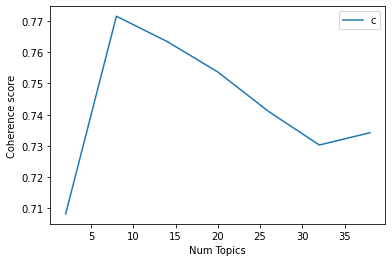

In [105]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [109]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.7083
Num Topics = 8  has Coherence Value of 0.7715
Num Topics = 14  has Coherence Value of 0.7634
Num Topics = 20  has Coherence Value of 0.7537
Num Topics = 26  has Coherence Value of 0.741
Num Topics = 32  has Coherence Value of 0.7303
Num Topics = 38  has Coherence Value of 0.7342


In [110]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.400*"datum" + 0.133*"learning" + 0.067*"transport" + 0.067*"drive" + '
  '0.067*"making" + 0.067*"trend" + 0.067*"economist" + 0.067*"imaging" + '
  '0.067*"probabilistic" + 0.000*"bioinformatic"'),
 (1,
  '0.438*"learning" + 0.125*"algorithm" + 0.125*"mining" + '
  '0.062*"probabilistic" + 0.062*"knowledge" + 0.062*"pylearn" + '
  '0.062*"adversarial" + 0.062*"nee" + 0.000*"sequential" + '
  '0.000*"bioinformatic"'),
 (2,
  '0.500*"machine" + 0.100*"method" + 0.050*"pattern" + 0.050*"sense" + '
  '0.050*"process" + 0.050*"industry" + 0.050*"enhance" + 0.050*"matter" + '
  '0.050*"understand" + 0.050*"dataemine"'),
 (3,
  '0.333*"machine" + 0.083*"discipline" + 0.083*"reference" + '
  '0.083*"comprehensive" + 0.083*"impact" + 0.083*"unifie" + '
  '0.083*"supercomputer" + 0.083*"molecule" + 0.083*"relationship" + '
  '0.000*"model"'),
 (4,
  '0.429*"learning" + 0.071*"historical" + 0.071*"intensive" + '
  '0.071*"supervised" + 0.071*"molecular" + 0.071*"neural" + 0.071*"online

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
 when compared LSA and LDA both of them provided the desired results but LSA is more faster when compared to LDA.
I think LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document.The accuracy of 
LDA is more when compared to LSA.Both use bag of words as input mixture. Latent Semantic Analysis learns latent topics by performing a matrix decomposition (SVD) on the term-document matrix.
The main drawback of SVD is too hard to determine the optimal number of dimensions.
LDA is a generative probabilistic model, that assumes a Dirichlet prior over the latent topics.